<a href="https://colab.research.google.com/github/shrishh9/Impact-of-social-media-on-mental-health/blob/main/Impact_of_social_media_on_mental_healthipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/social_media_survey_data.csv')

In [ ]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
    Timestamp  1. What is your age?          2. Gender 3. Relationship Status  \
0  2025-04-08                    22               Male       It's complicated   
1  2025-03-28                    19         Non-binary                Married   
2  2025-04-18                    19         Non-binary                 Single   
3  2025-04-15                    22         Non-binary      In a relationship   
4  2025-04-15                    25  Prefer not to say       It's complicated   

  4. Occupation Status 5. What type of organizations are you affiliated with?  \
0           Unemployed                                        Sports club       
1   Full-time employed                                        Sports club       
2               Intern                                         Non-profit       
3               Intern                                         Non-profit       
4   University Student                                          Corporate      

In [ ]:
# Display dataset information
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Timestamp                                                                                                             10000 non-null  object
 1   1. What is your age?                                                                                                  10000 non-null  int64 
 2   2. Gender                                                                                                             10000 non-null  object
 3   3. Relationship Status                                                                                                10000 non-null  o

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=["Timestamp"], errors="ignore")

# Rename columns
df.columns = [
    "Age", "Gender", "Relationship_Status", "Occupation_Status", "Organization_Type",
    "Uses_Social_Media", "Social_Media_Platforms", "Avg_Time_on_SM", "SM_Without_Purpose",
    "SM_Distracted", "SM_Restless", "Easily_Distracted", "Bothered_by_Worries",
    "Difficult_to_Concentrate", "Compare_Successful_People", "Comparison_Feelings",
    "Seek_Validation", "Feel_Depressed", "Interest_Fluctuation", "Sleep_Issues"
]

In [ ]:
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                             0
Gender                          0
Relationship_Status             0
Occupation_Status               0
Organization_Type            1625
Uses_Social_Media               0
Social_Media_Platforms       1621
Avg_Time_on_SM                  0
SM_Without_Purpose              0
SM_Distracted                   0
SM_Restless                     0
Easily_Distracted               0
Bothered_by_Worries             0
Difficult_to_Concentrate        0
Compare_Successful_People       0
Comparison_Feelings             0
Seek_Validation                 0
Feel_Depressed                  0
Interest_Fluctuation            0
Sleep_Issues                    0
dtype: int64


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Encode categorical columns
label_encoders = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Normalize and standardize numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

standard_scaler = StandardScaler()
df[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

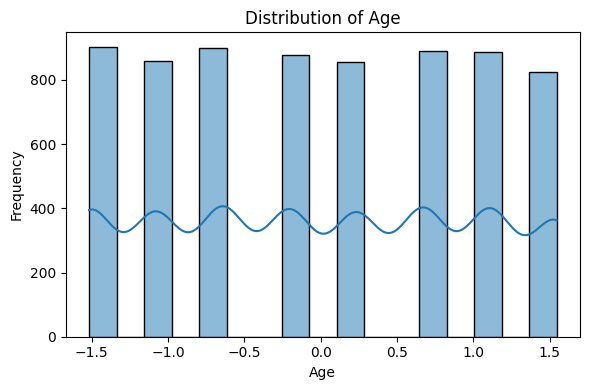

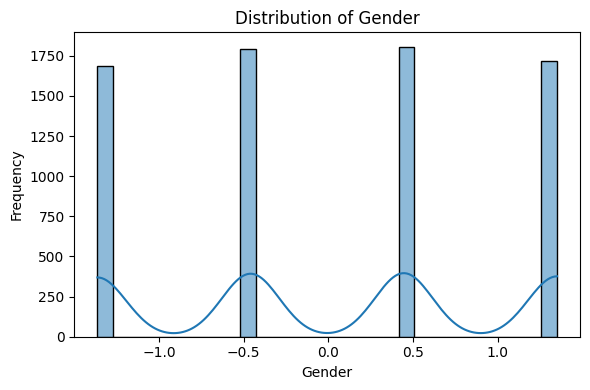

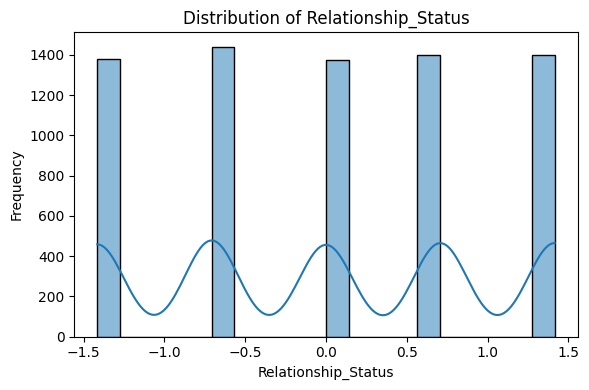

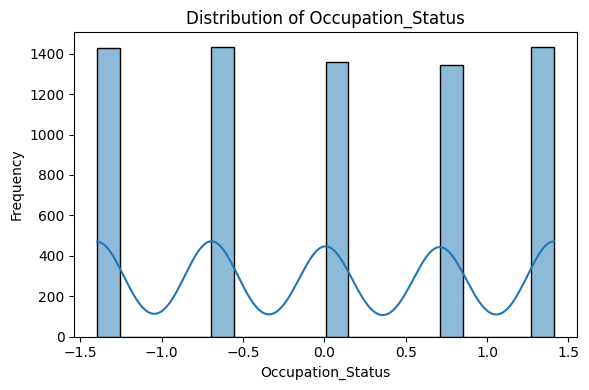

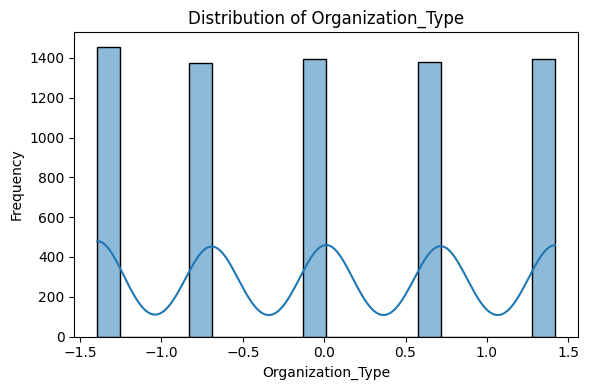

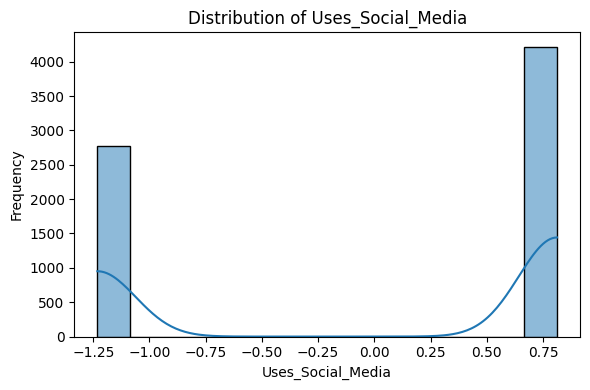

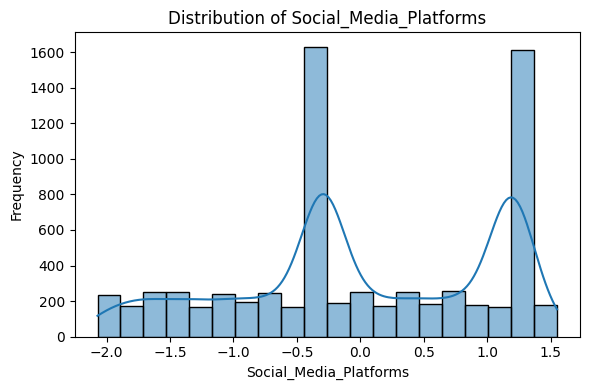

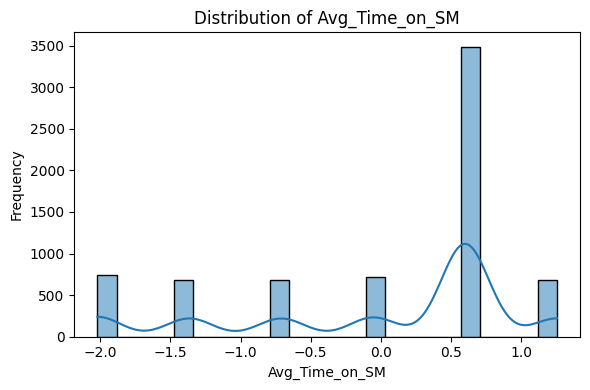

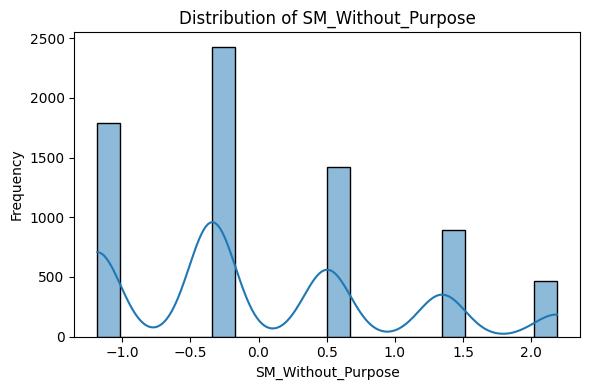

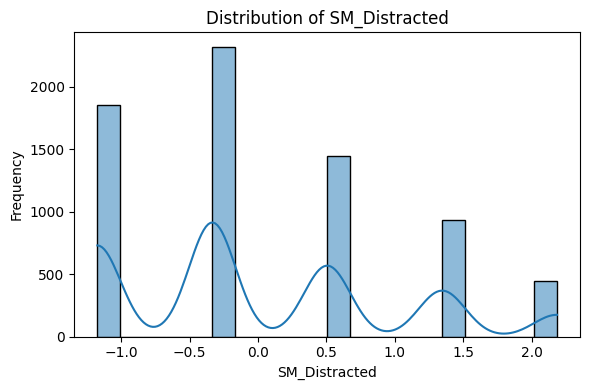

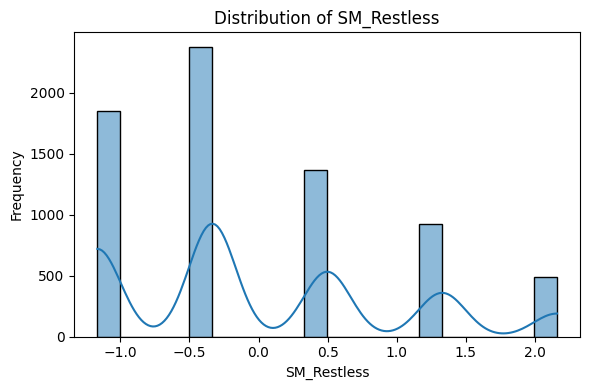

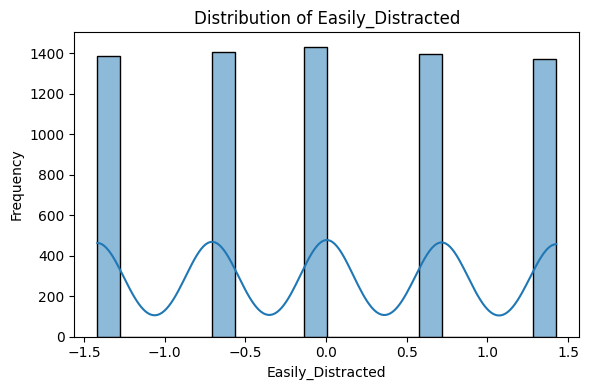

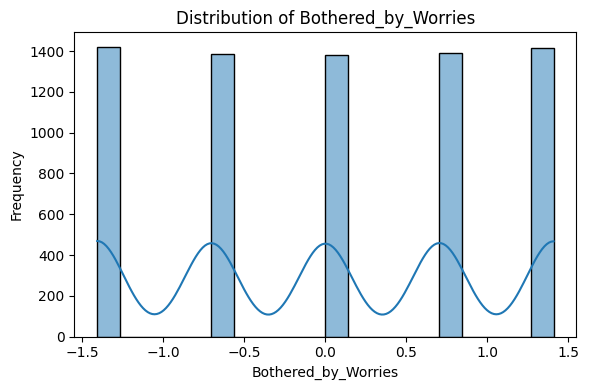

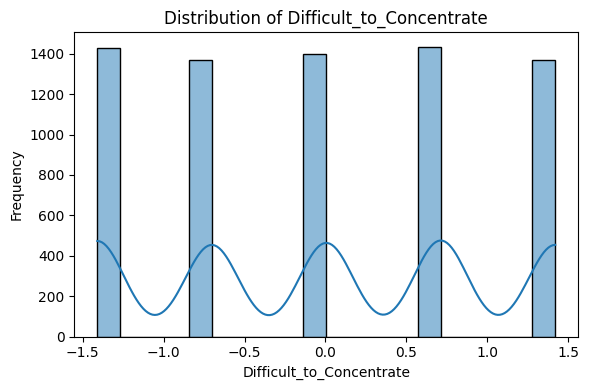

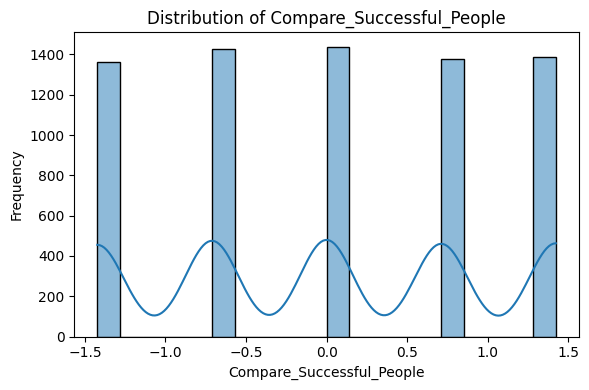

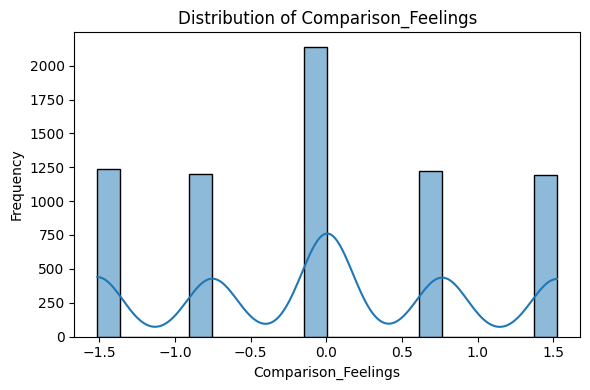

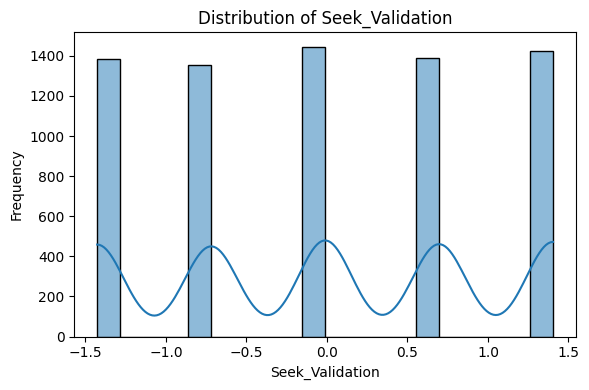

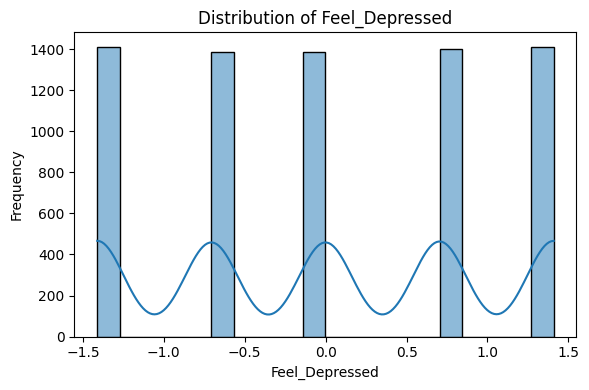

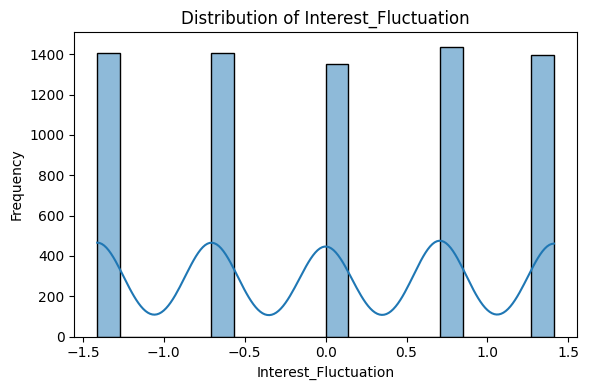

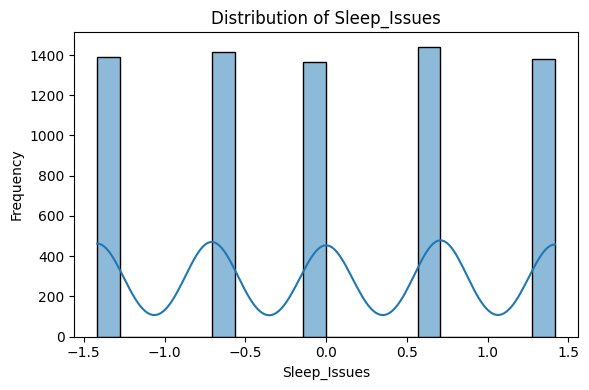

In [ ]:
# Exploratory Data Analysis (EDA)

# Univariate Analysis
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

The audience is mostly young—mental health trends might reflect this group more than older age groups.

Depression levels are mostly low-to-moderate, but there are some extreme cases.

Average sleep quality is moderate; poor or excellent sleep is rare.

Anxiety levels vary more than depression in this dataset.

Moderate usage is most common, but a few are heavily addicted to social media.

While many users report okay levels of self-esteem, there’s a vulnerable group.

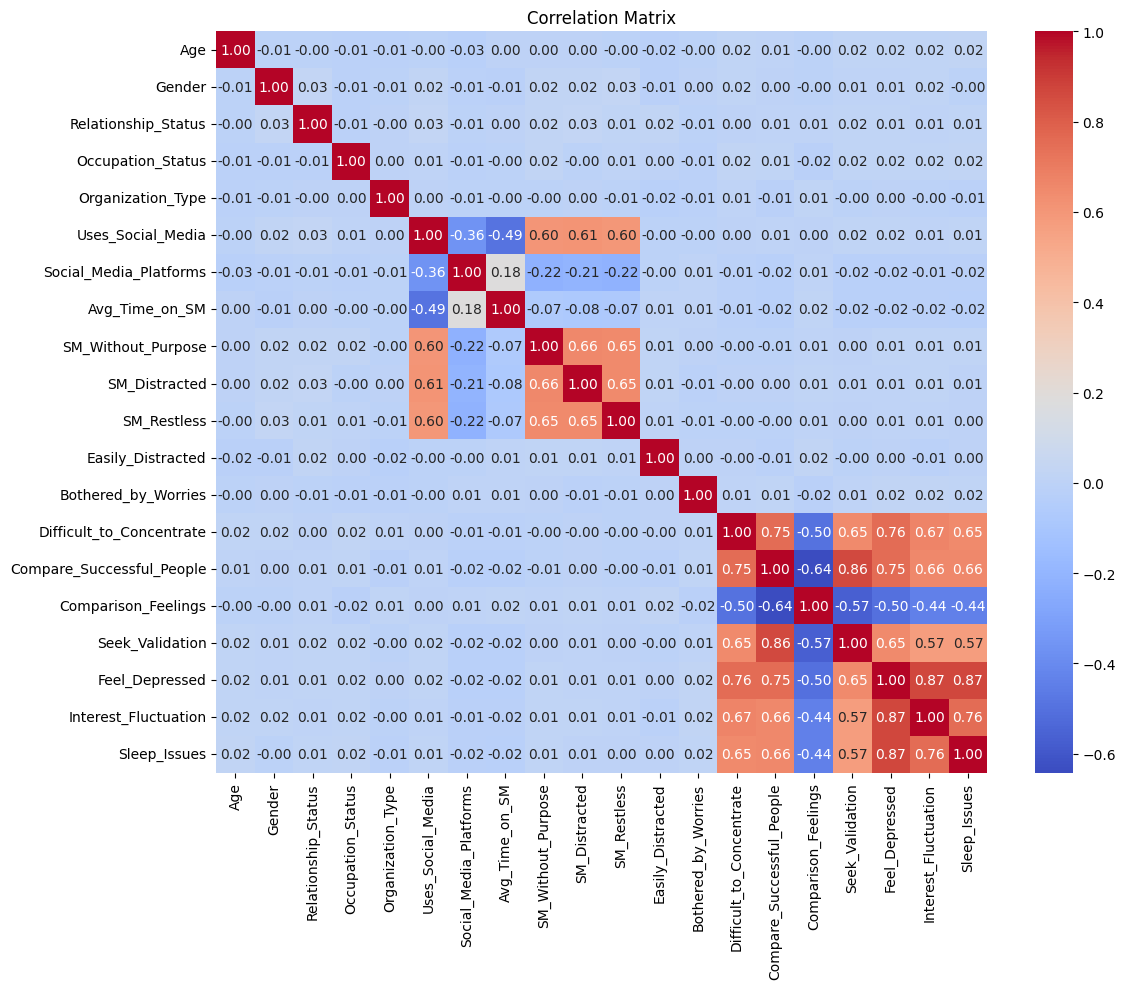

In [ ]:
# Bivariate Analysis - Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

People who feel depressed are also:

 Having sleep problems.

 Struggling with fluctuating interests/motivation.

 Comparing themselves to others and seeking validation.

 Experiencing negative feelings from social comparison.

Users who scroll mindlessly, feel distracted/restless while using social
media, also report mental health issues.

More time = more aimless use and distraction. That excessive use might be a red flag for poor digital wellbeing.

Mental health impacts are consistent regardless of demographics in your dataset.




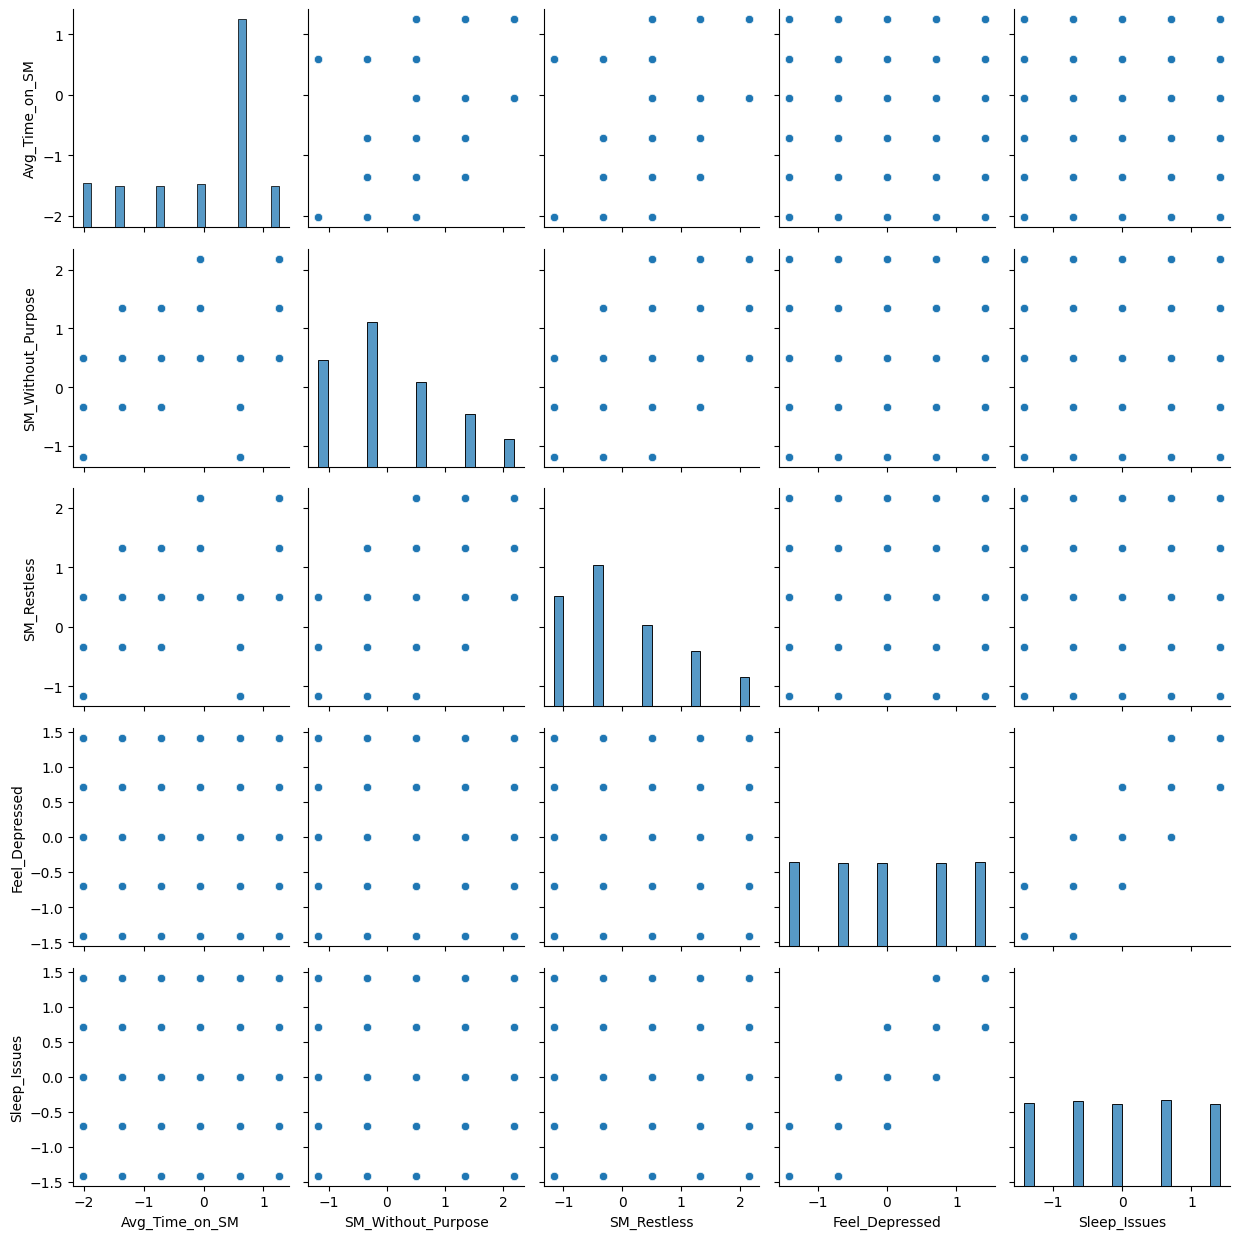

In [ ]:
# Multivariate Analysis - Pairplot
subset = ["Avg_Time_on_SM", "SM_Without_Purpose", "SM_Restless", "Feel_Depressed", "Sleep_Issues"]
sns.pairplot(df[subset])
plt.tight_layout()
plt.show()

People who use social media without a specific purpose tend to feel more restless when they aren’t using it.

Using social media aimlessly is linked to feeling more depressed.



In [ ]:
# Define Features and Target
X = df.drop("Feel_Depressed", axis=1)  # Feel_Depressed is our target variable
y = df["Feel_Depressed"].apply(lambda x: 1 if x > 0.5 else 0)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


Model Accuracy: 93.71%


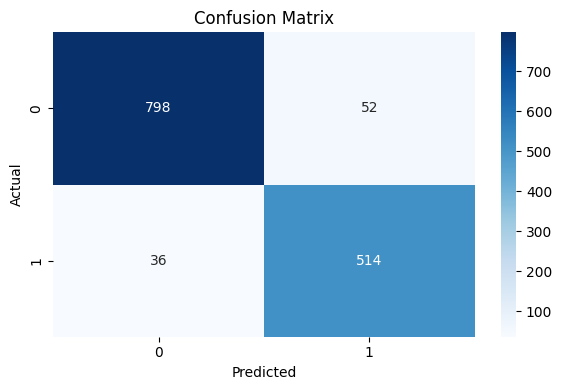

In [ ]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

The model performs well, correctly classifying most cases with low false predictions, showing good balance between sensitivity and specificity.

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({"Feature": features, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       850
           1       0.91      0.93      0.92       550

    accuracy                           0.94      1400
   macro avg       0.93      0.94      0.93      1400
weighted avg       0.94      0.94      0.94      1400



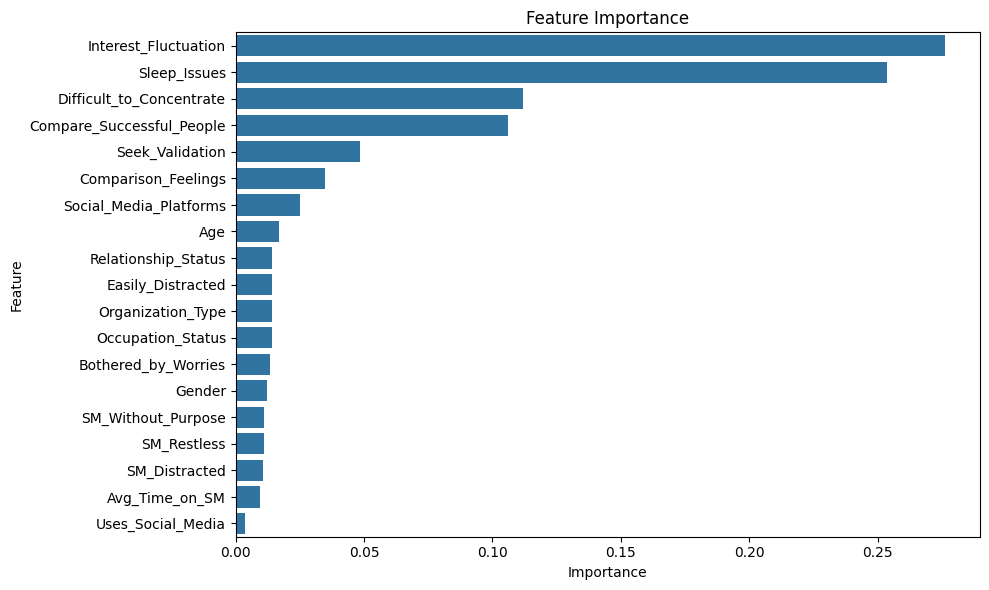

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()